In [1]:
import uproot
import matplotlib.pyplot as plt
from tbanalysis import helpers
import mplhep as hep

plt.style.use(hep.style.ATLAS)

In [2]:
run_number = 2420310
module = 'LBC65'
cell = 'A-3'
energy = 50000
theta = 20

In [3]:
f = uproot.open(f"../tiletb_{run_number}.root")['h1000']
arr = f['EfitC02'].arrays(library='np')['EfitC02']
num_events = len(arr)

In [4]:
efit_lbc = f['EfitC02'].arrays(library='np')['EfitC02']
efit_m_0_c = f['EfitC01'].arrays(library='np')['EfitC01']
efit_ebc = f['EfitE03'].arrays(library='np')['EfitE03']
efit_lbc =efit_lbc.T
efit_m_0_c = efit_m_0_c.T
efit_ebc = efit_ebc.T

In [5]:
# clong for A3
cell = 'A3'
c_long_cells = helpers.clong_contigious_cells('A3')

In [6]:
c_long_cells

[[5, 8, 9, 10, 15, 18], [11, 10, 21, 20, 32, 31]]

In [7]:
c_long_energy_lbc = efit_lbc[c_long_cells[0]]
c_long_energy_m_0_c = efit_m_0_c[c_long_cells[0]]
c_long_energy_ebc = efit_ebc[c_long_cells[1]]
c_long_cell_energy = c_long_energy_lbc + c_long_energy_m_0_c + c_long_energy_ebc

In [8]:
c_long_cell_energy.min()

np.float32(-2240.9111)

In [9]:
c_long_cell_energy.sum(axis=0)
import numpy as np
test = np.sum(c_long_cell_energy, axis=0)
test.shape

(50030,)

In [10]:
clong = helpers.get_clong(cell = 'A3', long_cell_energy=c_long_cell_energy, beam_energy=50000)
print(clong.shape, clong.min(), clong.max(), clong.mean())

3.2182813e-06
(50030,) 3.2182813e-06 1.9902483 0.72283846


[-1.0962105 -3.7852206  2.7991886  0.8048067 10.814398  10.133054 ]


(array([1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.]),
 array([-3.78522062, -3.32898259, -2.87274456, -2.41650629, -1.96026826,
        -1.50403023, -1.04779196, -0.59155393, -0.1353159 ,  0.32092237,
         0.77716017,  1.23339844,  1.68963671,  2.1458745 ,  2.60211277,
         3.05835056,  3.51458883,  3.9708271 ,  4.42706537,  4.88330317,
         5.33954096,  5.79577971,  6.2520175 ,  6.70825529,  7.16449404,
         7.62073183,  8.07696915,  8.53320694,  8.98944664,  9.44568443,
         9.90192223, 10.35816002, 10.81439781]),
 <BarContainer object of 32 artists>)

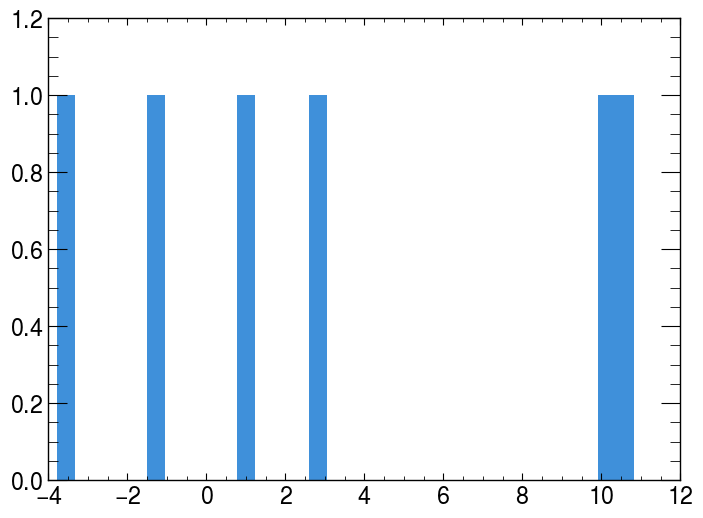

In [11]:
# neighbor long cells of A3
print(c_long_cell_energy[:, 420])
plt.hist(c_long_cell_energy[:, 420], bins=32)

In [12]:
c_tot_cells = helpers.ctot_contigious_cells(cell='A3')
print(c_tot_cells)

[[1, 4, 5, 8, 9, 10, 15, 18, 19, 20, 23, 24, 27, 30, 33, 36, 37, 38, 46, 47, 2, 3, 6, 7, 11, 12, 16, 17, 21, 22, 28, 29, 34, 35, 40, 41, 44, 45, 0, 13, 14, 25, 26, 39, 42], [6, 7, 10, 11, 20, 21, 31, 32, 40, 41, 8, 9, 14, 15, 22, 23, 30, 35, 36, 39, 2, 3, 4, 5, 16, 17, 37, 38]]


In [13]:
print(efit_lbc.shape)

(48, 50030)


In [14]:
c_tot_lbc_neighbor = efit_lbc[c_tot_cells[0]]
c_tot_m_0_c_neighbor = efit_m_0_c[c_tot_cells[0]]
c_tot_ebc_neighbor = efit_ebc[c_tot_cells[1]]
print(c_tot_lbc_neighbor.shape, c_tot_cells[0])
print(c_tot_m_0_c_neighbor.shape, c_tot_cells[0])
print(c_tot_ebc_neighbor.shape, c_tot_cells[1])

(45, 50030) [1, 4, 5, 8, 9, 10, 15, 18, 19, 20, 23, 24, 27, 30, 33, 36, 37, 38, 46, 47, 2, 3, 6, 7, 11, 12, 16, 17, 21, 22, 28, 29, 34, 35, 40, 41, 44, 45, 0, 13, 14, 25, 26, 39, 42]
(45, 50030) [1, 4, 5, 8, 9, 10, 15, 18, 19, 20, 23, 24, 27, 30, 33, 36, 37, 38, 46, 47, 2, 3, 6, 7, 11, 12, 16, 17, 21, 22, 28, 29, 34, 35, 40, 41, 44, 45, 0, 13, 14, 25, 26, 39, 42]
(28, 50030) [6, 7, 10, 11, 20, 21, 31, 32, 40, 41, 8, 9, 14, 15, 22, 23, 30, 35, 36, 39, 2, 3, 4, 5, 16, 17, 37, 38]


In [15]:
c_tot_energy_for_calc = np.concatenate((c_tot_lbc_neighbor, c_tot_m_0_c_neighbor, c_tot_ebc_neighbor), axis=0)

In [16]:
ctot = helpers.get_ctot(cell='A3', ctot_cell_energy=c_tot_energy_for_calc)

In [17]:
print(clong.shape, ctot.shape)

(50030,) (50030,)


In [18]:
print("clong has NaNs:", np.isnan(clong).any())
print("ctot has NaNs:", np.isnan(ctot).any())
print("clong shape:", clong.shape)
print("ctot shape:", ctot.shape)


clong has NaNs: False
ctot has NaNs: False
clong shape: (50030,)
ctot shape: (50030,)


0.11154809 0.013054296 0.72283846 0.3437784


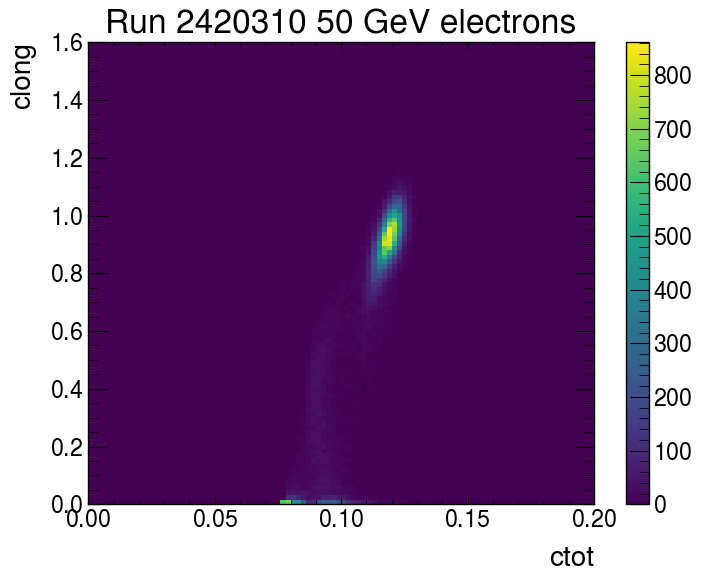

In [19]:
plt.hist2d(ctot, clong, bins=(100, 100), range=[[0, 0.2], [0, 1.6]], cmap='viridis')
plt.title('Run 2420310 50 GeV electrons')
plt.xlabel('ctot')
plt.ylabel('clong')
plt.colorbar()
print(ctot.mean(), ctot.std(), clong.mean(), clong.std())

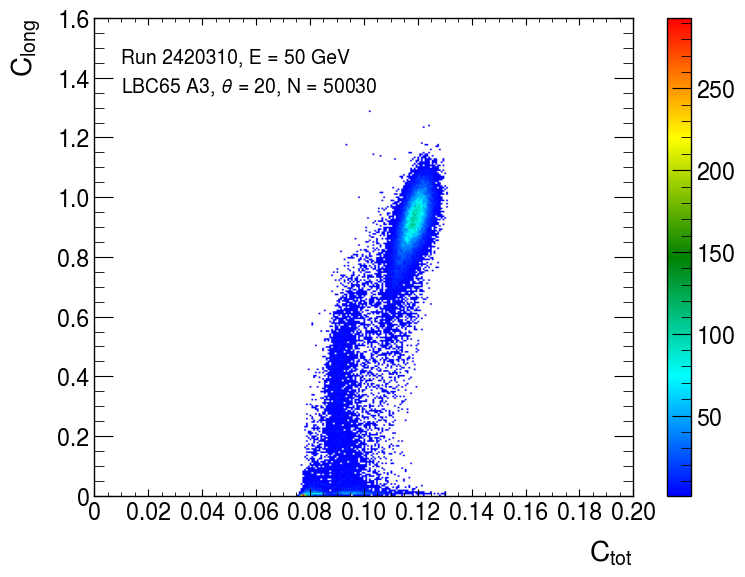

In [20]:
from matplotlib.colors import LinearSegmentedColormap
import numpy.ma as ma

fig, ax = plt.subplots(figsize=(8, 6))

x_min, x_max = 0, 0.2
y_min, y_max = 0, 1.6
num_xbins = 300
num_ybins = 300

x_ticks = np.arange(0, 0.22, 0.02)
y_ticks = np.arange(0, 1.8, 0.2)

plt.xticks(x_ticks)
plt.yticks(y_ticks)

plt.gca().set_xticklabels([f"{x:.2f}" for x in x_ticks])
plt.gca().set_yticklabels([f"{y:.1f}" for y in y_ticks])
plt.gca().set_xticklabels([f"{x:.0f}" if x == 0 else f"{x:.2f}" for x in x_ticks])
plt.gca().set_yticklabels([f"{y:.0f}" if y == 0 else f"{y:.1f}" for y in y_ticks])


H, xedges, yedges = np.histogram2d(ctot, clong, bins=[num_xbins, num_ybins],
                                   range=[[x_min, x_max], [y_min, y_max]])

H = H.T  

# Mask bins with zero entries
H_masked = ma.masked_where(H == 0, H)

colors = ["blue", "cyan", "green", "yellow", "red"] # supposed to be like ROOT "colz"
custom_cmap = LinearSegmentedColormap.from_list("my_blue_yellow_cmap", colors)
custom_cmap.set_bad(color='white')

im = plt.imshow(H_masked, origin='lower',
                extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
                cmap=custom_cmap,
                aspect='auto')
plt.text(x=0.01, y=1.45, s=f'Run {run_number}, E = {energy//1000} GeV')
plt.text(x = 0.01, y=1.35, s=f'{module} {cell}, ' + r'$\theta$ = ' + f'{theta}, N = {num_events}')
plt.colorbar(im)
plt.xlabel(r'$\text{C}_{\text{tot}}$')
plt.ylabel(r'$\text{C}_{\text{long}}$')
plt.tight_layout()